In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## a. Load data

In [2]:
%%time
historical_transactions = pd.read_csv('../input_data/historical_transactions.csv')
new_merchant_transactions = pd.read_csv('../input_data/new_merchant_transactions.csv')
merchants = pd.read_csv('../input_data/merchants.csv')
train = pd.read_csv('../input_data/train.csv')
test = pd.read_csv('../input_data/test.csv')

Wall time: 3min 9s


## b. Data exploration - Train & Test

Let's look at some basic statistics of **train** and **test**

In [3]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB
None


,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null object
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.7+ MB
None


,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


There is one **MISSING VALUE** for the *first_active_month" column in the test set

### b1. Train - target

In [5]:
train.target.describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

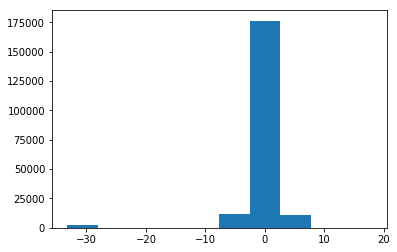

In [6]:
plt.hist(train.target);

The values at around -30 look really weird!! Let's take a closer look

In [7]:
train[train.target < -20].target.value_counts()

-33.219281    2207
Name: target, dtype: int64

There is only one associated target value: -33.219281. It might mean something. Let's keep in mind and move on

### b2. Train / Test - first_active_month

In [8]:
print(train.first_active_month.describe())
print(test.first_active_month.describe())

count      201917
unique         75
top       2017-09
freq        13878
Name: first_active_month, dtype: object
count      123622
unique         75
top       2017-09
freq         8805
Name: first_active_month, dtype: object


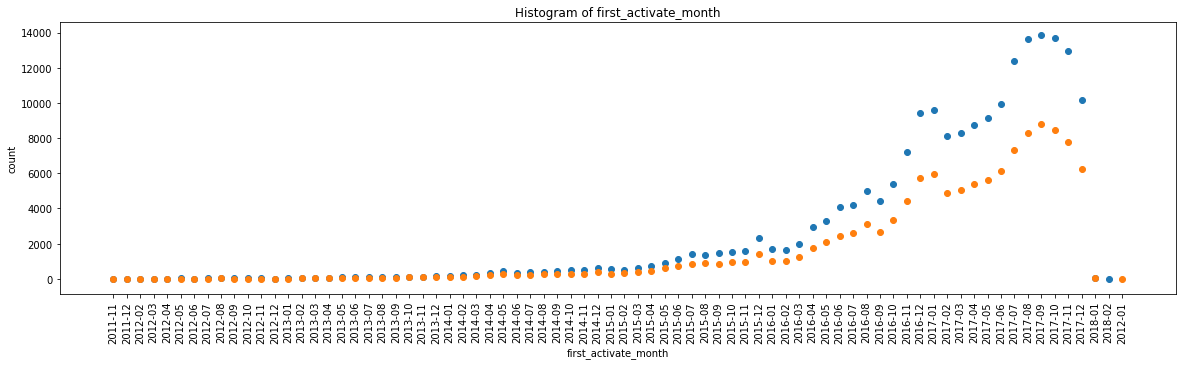

In [9]:
df_train = train['first_active_month'].value_counts().sort_index()
df_test = test['first_active_month'].value_counts().sort_index()

plt.figure(figsize=(20, 5))
plt.scatter(df_train.index, df_train.values)
plt.scatter(df_test.index, df_test.values)
plt.title("Histogram of first_activate_month")
plt.xlabel("first_activate_month")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

del df_train
del df_test

The **first_active_month** columns in the train and test data are from the same distribution

Let's look at the boxplot for **target** as a function of **first_active_month**

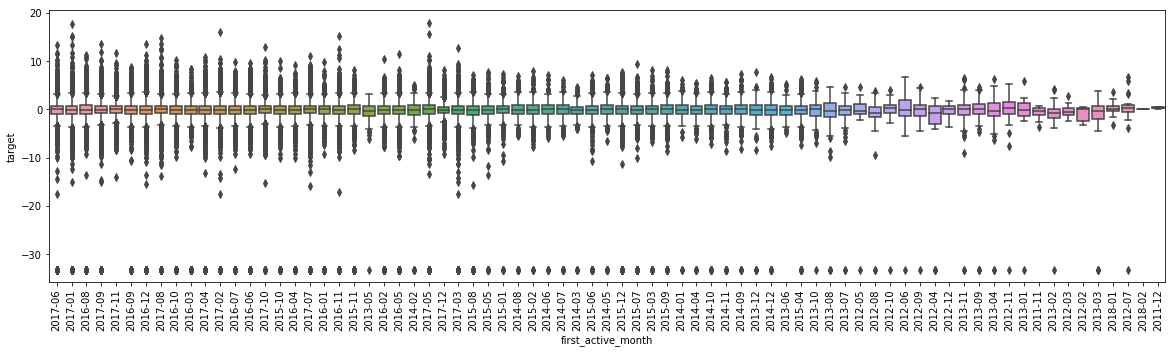

In [10]:
f, axes = plt.subplots(1, 1, figsize=(20,5))
sns.boxplot(data=train, x='first_active_month', y='target')
plt.xticks(rotation=90);

Seems like the **first_active_month** does not have large impact on the **target**. The **target** is always close to ZERO

### b3. Train / Test - feature_1, feature_2, feature_3

Histogram of **feature_1**, **feature_2**, and **feature_3**

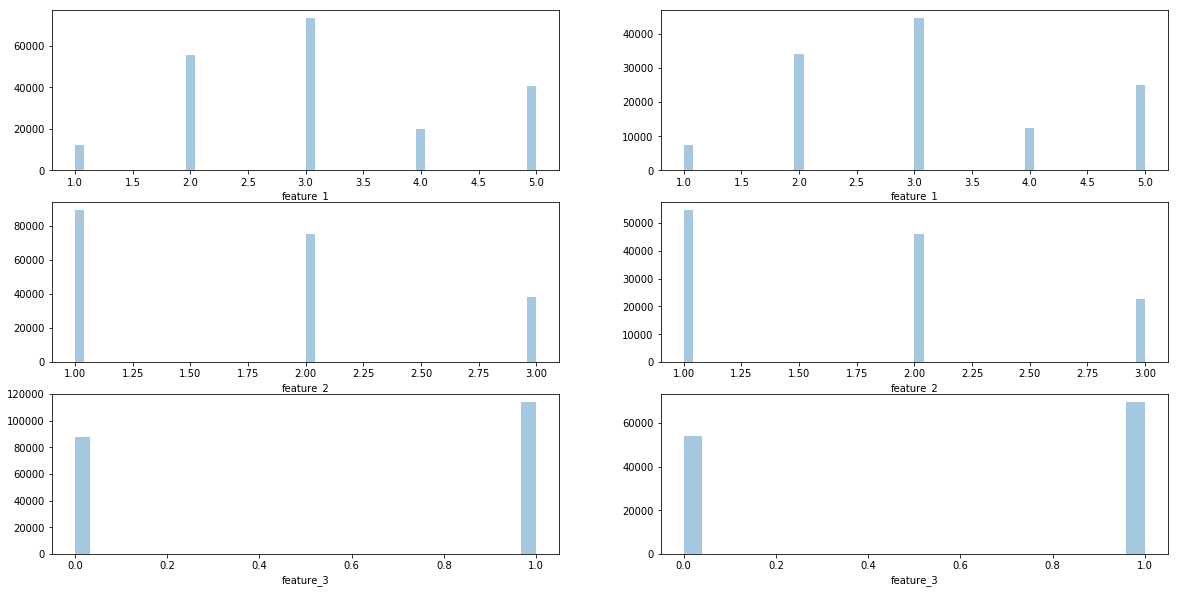

In [11]:
f, axes = plt.subplots(3, 2, figsize=(20,10))
sns.distplot(train['feature_1'], kde=False, ax=axes[0][0])
sns.distplot(test['feature_1'], kde=False, ax=axes[0][1])
sns.distplot(train['feature_2'], kde=False, ax=axes[1][0])
sns.distplot(test['feature_2'], kde=False, ax=axes[1][1])
sns.distplot(train['feature_3'], kde=False, ax=axes[2][0])
sns.distplot(test['feature_3'], kde=False, ax=axes[2][1])

Similar to **first_active_month**, train and test dataset have about the same distributions for **feature_1**, **feature_2**, and **feature_3**

Let's look at the correlation between **feature_1**/**feature_2**/**feature_3** with **target**

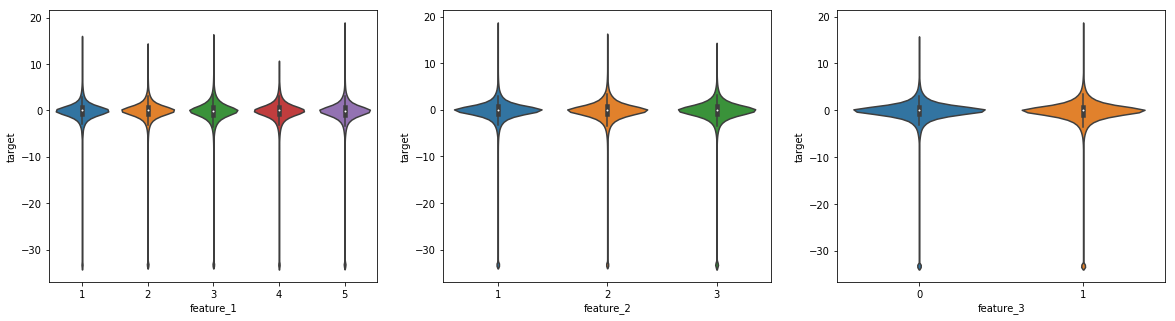

In [12]:
f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.violinplot(data=train, x='feature_1', y='target', ax=axes[0]);
sns.violinplot(data=train, x='feature_2', y='target', ax=axes[1]);
sns.violinplot(data=train, x='feature_3', y='target', ax=axes[2]);

Unfortunately, none of the **feature_i (i=1,2,3)** correlates strongly with **target**

## c. Data exploration - historical_transactions

In [13]:
print(historical_transactions.info())
historical_transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB
None


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


### c1. historical_transactions - authorized_flag

convert it into a binary value

In [14]:
%%time
historical_transactions['authorized_flag'] = historical_transactions['authorized_flag'].apply(lambda x:1 if x == 'Y' else 0)

Wall time: 36.7 s


Plot the histogram

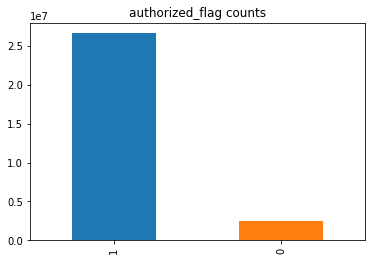

In [15]:
historical_transactions['authorized_flag'].value_counts().plot(kind='bar', title='authorized_flag counts');

### c2. historical_transactions - city_id

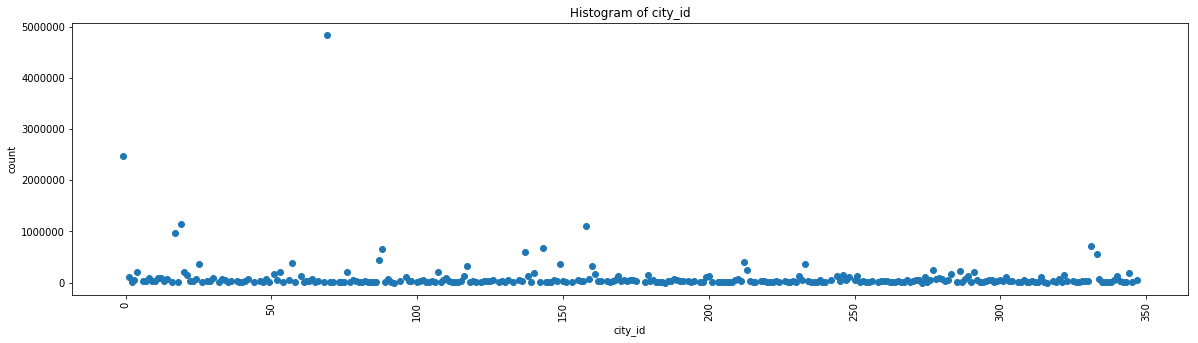

In [16]:
df = historical_transactions['city_id'].value_counts().sort_index()

plt.figure(figsize=(20, 5))
plt.scatter(df.index, df.values)
plt.title("Histogram of city_id")
plt.xlabel("city_id")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

### c3. historical_transactions - category_1, category_2, category_3

convert **category_1**, **category_2**, and **category_3** into categorical values

In [17]:
%%time
historical_transactions['category_1'] = historical_transactions['category_1'].apply(lambda x:1 if x == 'Y' else 0)

map_dict = {'A':0, 'B':1, 'C':2, 'nan': 3}
historical_transactions['category_3'] = historical_transactions['category_3'].apply(lambda x: map_dict[str(x)])

Wall time: 1min 7s


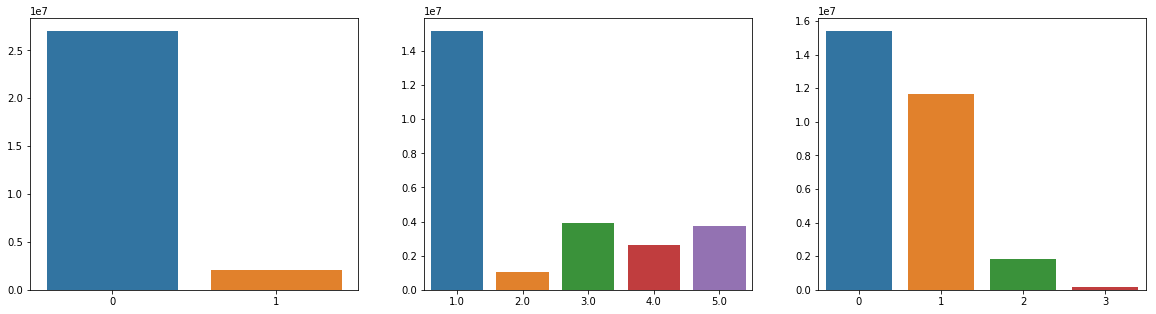

In [18]:
df_1 = historical_transactions['category_1'].value_counts().sort_index()
df_2 = historical_transactions['category_2'].value_counts().sort_index()
df_3 = historical_transactions['category_3'].value_counts().sort_index()

f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.barplot(df_1.index, df_1.values, ax=axes[0])
sns.barplot(df_2.index, df_2.values, ax=axes[1])
sns.barplot(df_3.index, df_3.values, ax=axes[2])
plt.show()

del df_1
del df_2
del df_3

### c4. historical_transactions - installments

In [19]:
historical_transactions['installments'].value_counts()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

The value of -1 and 999 looks intriguing. Maybe they are the ones NOT being authorized?

In [20]:
historical_transactions.groupby(['installments'])['authorized_flag'].mean()

installments
-1      0.885692
 0      0.928032
 1      0.907024
 2      0.884020
 3      0.862254
 4      0.819903
 5      0.809183
 6      0.779732
 7      0.693196
 8      0.692439
 9      0.663721
 10     0.702021
 11     0.660241
 12     0.653694
 999    0.031915
Name: authorized_flag, dtype: float64

The mean value of **authorized_flag** is nearly 0 when **installments** value is 999. Let's be aware of this correlation.

### c5. historical_transactions - purchase_amount

Wall time: 6.91 s


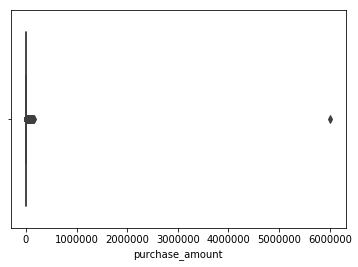

In [21]:
%%time
sns.boxplot(historical_transactions['purchase_amount'])

There is one outlier! Let's remove this value and try again

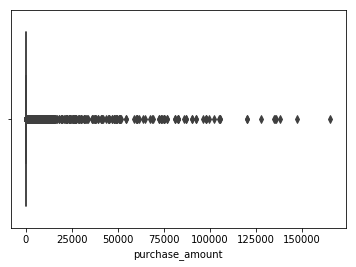

In [22]:
sns.boxplot(historical_transactions[historical_transactions.purchase_amount < 1000000]['purchase_amount'])

It's weird that there are negative values for **purchase_amount**. Let's plot the histogram of negative values

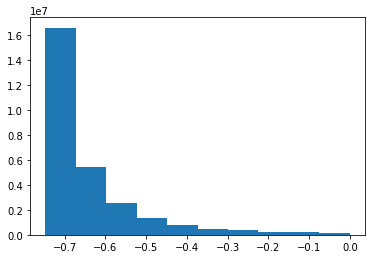

Wall time: 1min 15s


In [23]:
%%time
plt.hist(historical_transactions[historical_transactions.purchase_amount < 0]['purchase_amount'])
plt.show()

These values need to be taken with extra caution when it comes to feature engineering

## d. Data exploration - merchants

In [24]:
print(merchants.info())
merchants.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int64
merchant_category_id           334696 non-null int64
subsector_id                   334696 non-null int64
numerical_1                    334696 non-null float64
numerical_2                    334696 non-null float64
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float64
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int64
avg_sales_lag6                 334683 non-null float64
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int64
avg_sales_lag12                334683 non-null float64
avg_purchases_lag12    

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


### d1. merchants - numerical_1, numerical_2

In [25]:
print(merchants['numerical_1'].describe())
print(merchants['numerical_2'].describe())

count    334696.000000
mean          0.011476
std           1.098154
min          -0.057471
25%          -0.057471
50%          -0.057471
75%          -0.047556
max         183.735111
Name: numerical_1, dtype: float64
count    334696.000000
mean          0.008103
std           1.070497
min          -0.057471
25%          -0.057471
50%          -0.057471
75%          -0.047556
max         182.079322
Name: numerical_2, dtype: float64


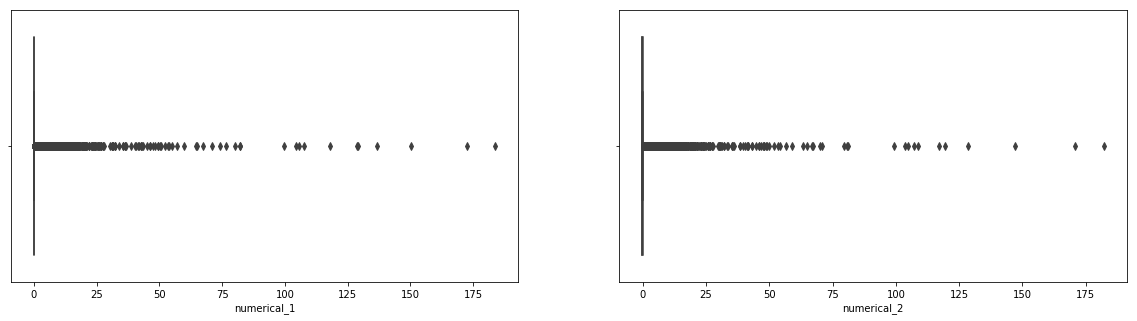

In [26]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(merchants['numerical_1'], ax=axes[0])
sns.boxplot(merchants['numerical_2'], ax=axes[1])

There are values smaller than zero. Let's plot the distribution

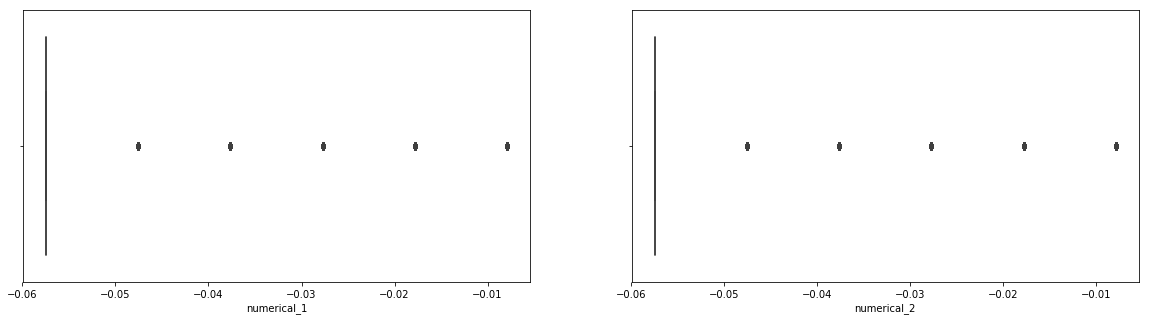

In [27]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(merchants[merchants.numerical_1 < 0]['numerical_1'], ax=axes[0])
sns.boxplot(merchants[merchants.numerical_2 < 0]['numerical_2'], ax=axes[1])

Similar to the **purchase_amount** column in *historical_transations*, these negative and discrete values need some attention

### d2. merchants - category_1, category_2, category_4

In [28]:
%%time
merchants['category_1'] = merchants['category_1'].apply(lambda x : 1 if x == 'Y' else 0)
merchants['category_4'] = merchants['category_4'].apply(lambda x : 1 if x == 'Y' else 0)
merchants['category_2'] = merchants['category_2'].fillna(0)

Wall time: 529 ms


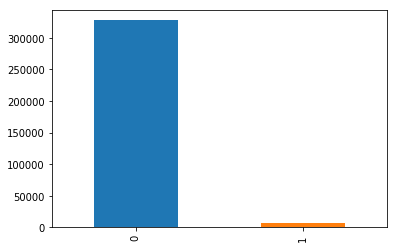

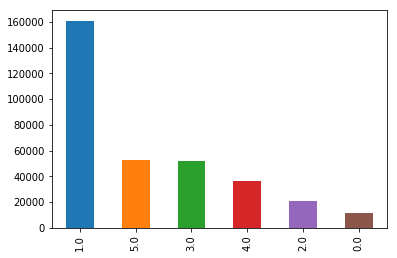

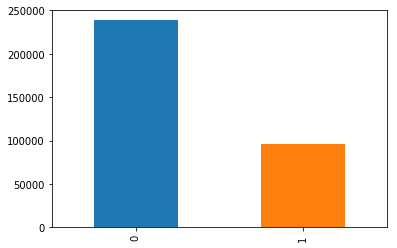

In [29]:
merchants['category_1'].value_counts().plot('bar')
plt.show()
merchants['category_2'].value_counts().plot('bar')
plt.show()
merchants['category_4'].value_counts().plot('bar')
plt.show()

### d3. merchants - most_recent_sales_range

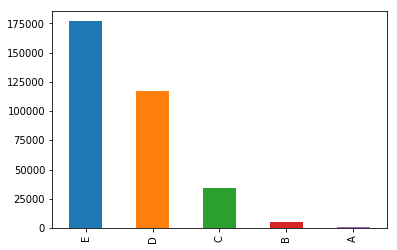

In [30]:
merchants['most_recent_sales_range'].value_counts().plot('bar')
plt.show()

### d4. merchants - most_recent_purchases_range

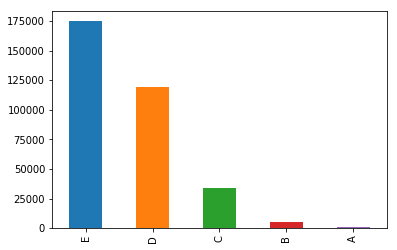

In [31]:
merchants['most_recent_purchases_range'].value_counts().plot('bar')
plt.show()

The distribution looks a lot like **most_recent_sales_range**. Any correlation?

In [32]:
# Scatter Matrix

### d5. merchants - avg_sales_lag3, avg_sales_lag6, avg_sales_lag12

In [33]:
print(merchants['avg_sales_lag3'].describe())
print(merchants['avg_sales_lag6'].describe())
print(merchants['avg_sales_lag12'].describe())

count    334683.000000
mean         13.832993
std        2395.489999
min         -82.130000
25%           0.880000
50%           1.000000
75%           1.160000
max      851844.640000
Name: avg_sales_lag3, dtype: float64
count    3.346830e+05
mean     2.165079e+01
std      3.947108e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.010000e+00
75%      1.230000e+00
max      1.513959e+06
Name: avg_sales_lag6, dtype: float64
count    3.346830e+05
mean     2.522771e+01
std      5.251842e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.020000e+00
75%      1.290000e+00
max      2.567408e+06
Name: avg_sales_lag12, dtype: float64


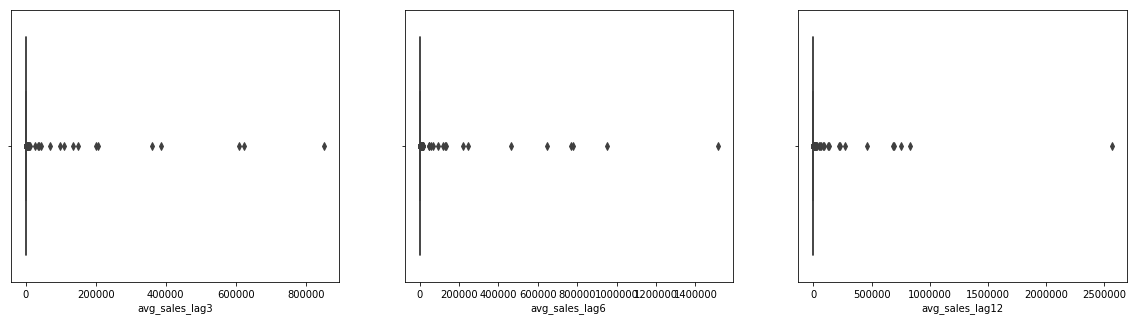

In [34]:
f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.boxplot(merchants['avg_sales_lag3'], ax=axes[0])
sns.boxplot(merchants['avg_sales_lag6'], ax=axes[1])
sns.boxplot(merchants['avg_sales_lag12'], ax=axes[2])
plt.show()

Let's remove the crazy values and replot the distribution

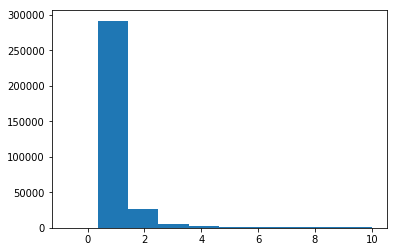

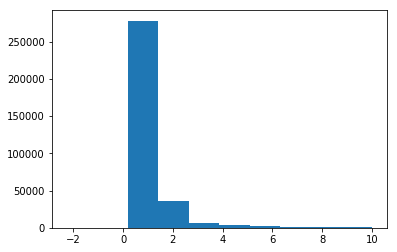

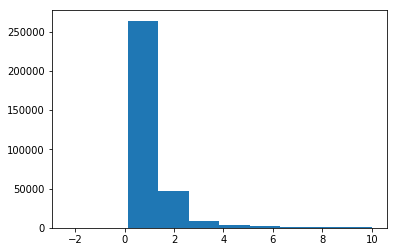

In [35]:
plt.hist(merchants[(merchants.avg_sales_lag3 < 10) & (merchants.avg_sales_lag3 > -10)]['avg_sales_lag3']);
plt.show()
plt.hist(merchants[(merchants.avg_sales_lag6 < 10) & (merchants.avg_sales_lag6 > -10)]['avg_sales_lag6']);
plt.show()
plt.hist(merchants[(merchants.avg_sales_lag12 < 10) & (merchants.avg_sales_lag12 > -10)]['avg_sales_lag12']);
plt.show()

The distributions look quite nice for the bulk part

### d6. merchants - active_months_lag6, active_months_lag12

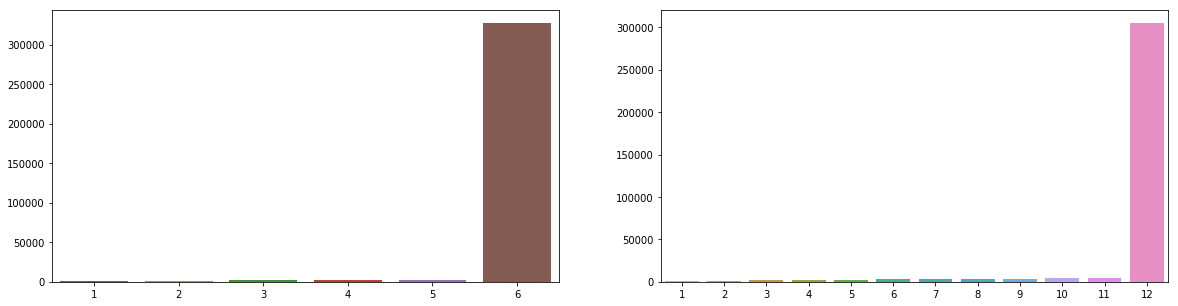

In [36]:
df_1 = merchants['active_months_lag6'].value_counts()
df_2 = merchants['active_months_lag12'].value_counts()

f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.barplot(df_1.index, df_1.values, ax=axes[0])
sns.barplot(df_2.index, df_2.values, ax=axes[1])
plt.show()

del df_1
del df_2

### d7. merchants - city_id

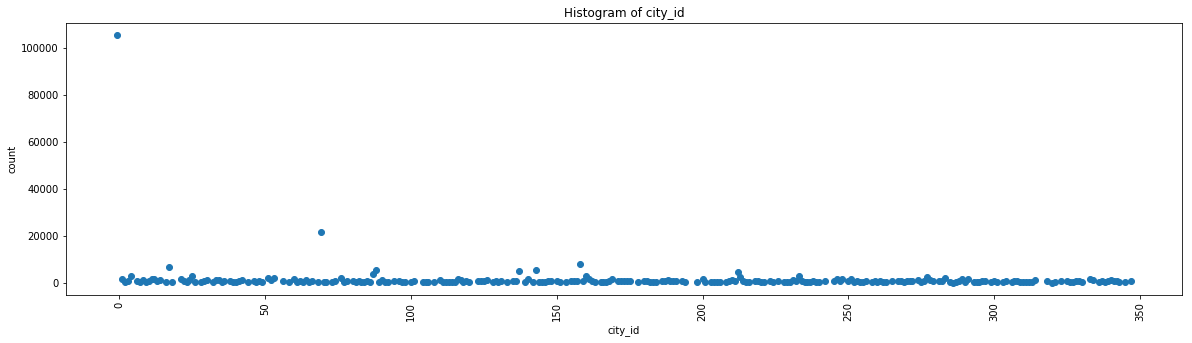

In [37]:
df = merchants['city_id'].value_counts().sort_index()

plt.figure(figsize=(20, 5))
plt.scatter(df.index, df.values)
plt.title("Histogram of city_id")
plt.xlabel("city_id")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

del df

The missing value "-1" is the majority of **city_id**

### d8. merchants - state_id

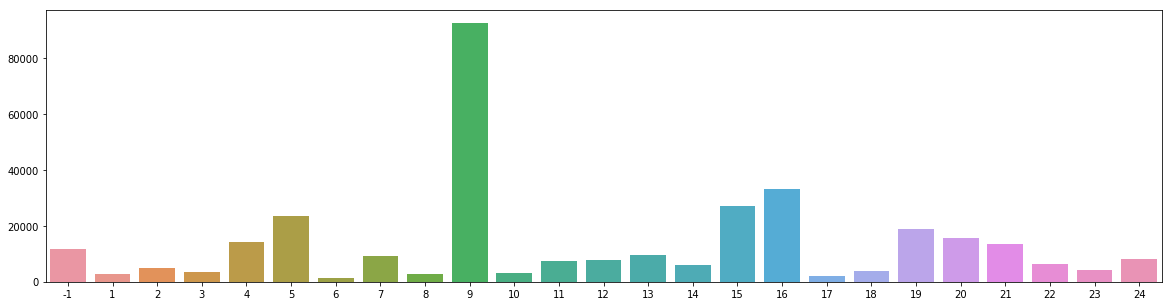

In [38]:
df = merchants['state_id'].value_counts().sort_index()

f, axes = plt.subplots(1, 1, figsize=(20,5))
sns.barplot(df.index, df.values)
plt.show()

del df

### d9. merchants - subsector_id

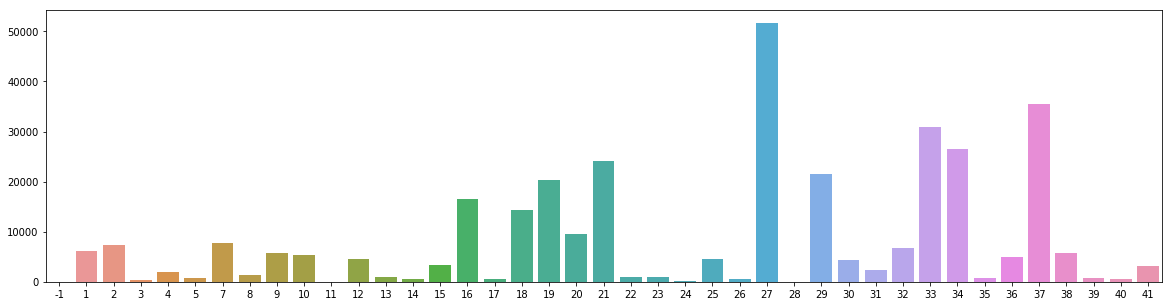

In [39]:
df = merchants['subsector_id'].value_counts().sort_index()

f, axes = plt.subplots(1, 1, figsize=(20,5))
sns.barplot(df.index, df.values)
plt.show()

del df

In [40]:
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,0,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,0,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,0,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,0,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,0,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,0,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,1,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,1,-1,-1,0.0
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,1,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,1,-1,-1,0.0


### d10. explore the scatter matrix 

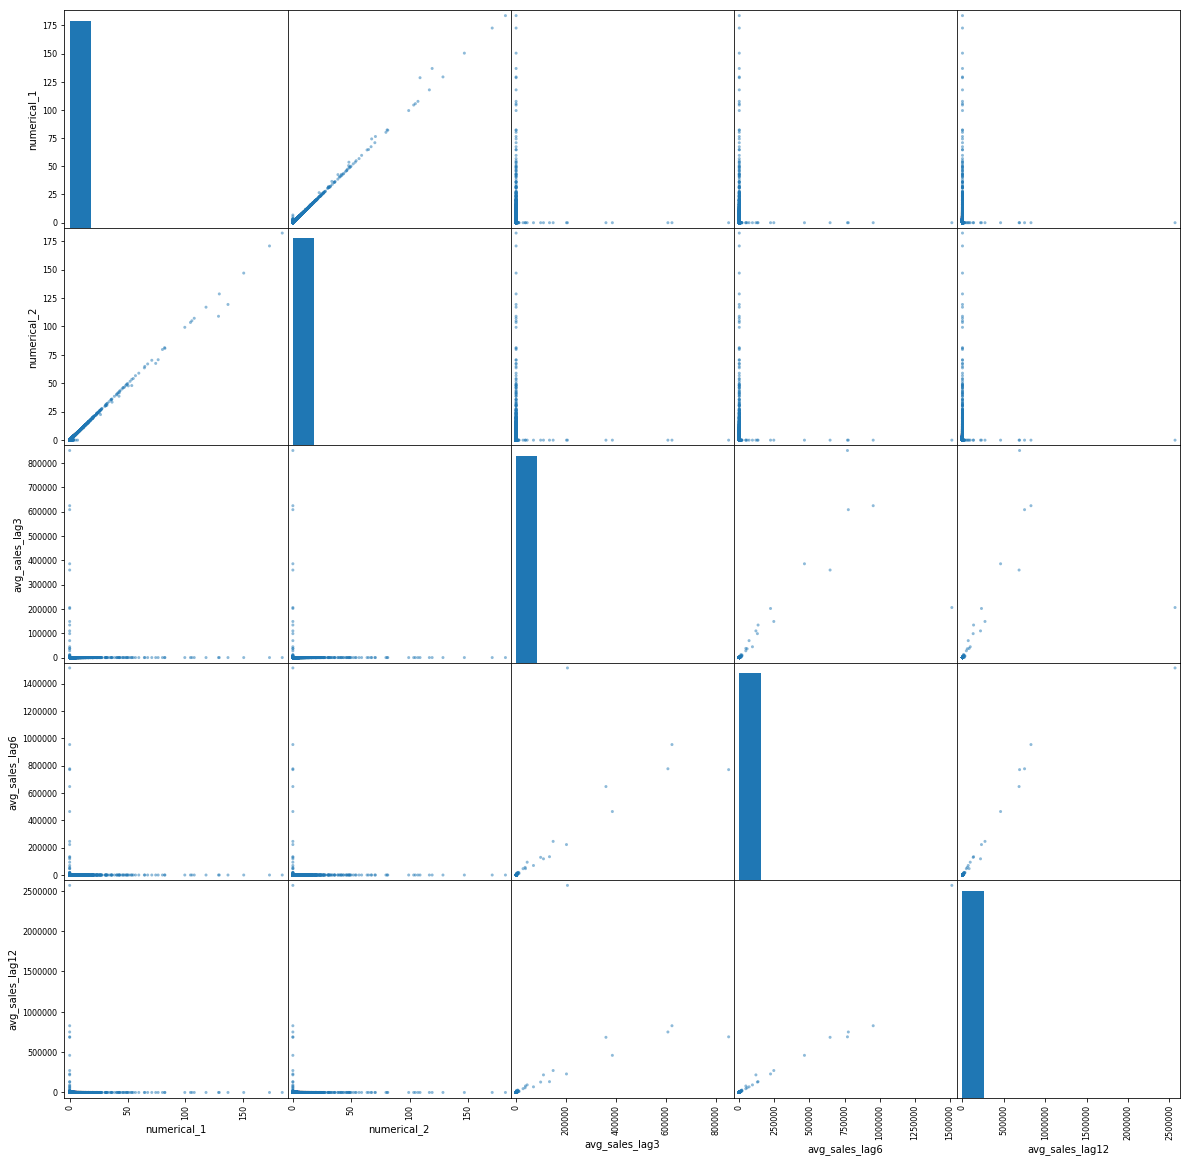

Wall time: 2min 42s


In [41]:
%%time
from pandas.plotting import scatter_matrix

attributes = ['numerical_1', 'numerical_2','avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']
scatter_matrix(merchants[attributes], figsize=(20,20));
plt.show()

The scatter matrix shows that **numerical_1** and **numerical_2** are strongly correlated, and **avg_sales_lag** features are also correlated